<a href="https://colab.research.google.com/github/tfysekis/Data-Mining/blob/master/Mining_Knowledge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Άσκηση 1. Μετασχηματισμός και ανάλυση πρωτογενών δεδομένων**

We download the contect of the .csv file that we are working on (GroceriesInitial.csv)

In [126]:
!gdown --id 1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s
To: /content/GroceriesInitial.csv
100% 823k/823k [00:00<00:00, 84.1MB/s]


Now we are storing the data with the help of the pandas library so we can manage them.

In [127]:
import pandas as pd 

data = pd.read_csv('GroceriesInitial.csv', delimiter=',', header='infer')

Now that we have the data into a DataFrame we can start,this a quick glimpse of the data to check if it was properly loaded into the DataFrame

In [128]:
data.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A descriptive statistics summary for the basket_value column.

In [129]:
data['basket_value'].describe()

count    7536.000000
mean        5.036584
std         3.692088
min         1.100000
25%         2.200000
50%         4.100000
75%         7.000000
max        25.100000
Name: basket_value, dtype: float64

Now we are going to visual our data for the basket_value,in general,a reasonable number of bins for a histogram is the square root of the number of observations in the dataset.We have aroud 7.500 items in our case, the square root of 7500 is approximately 87, so we could start by using 87 bins in our histogram.

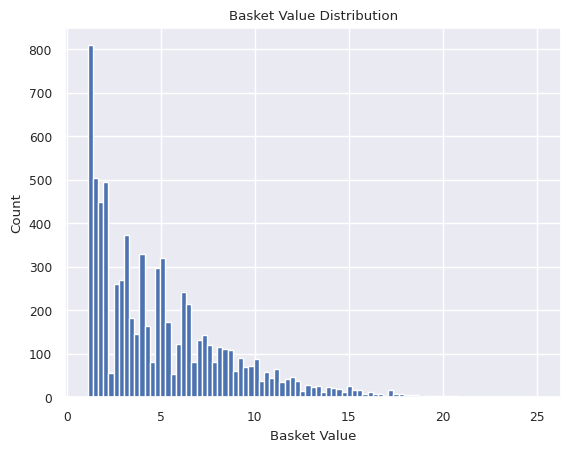

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data['basket_value'], bins=87)
plt.title('Basket Value Distribution')
plt.xlabel('Basket Value')
plt.ylabel('Count')
plt.show()

The histogram of the 'basket_value' variable shows a skewed right distribution, which indicates that there are relatively few high-value purchases that are driving up the overall average basket value.In this case, the histogram shows that there are a small number of customers who are making large purchases, while the majority of customers are making smaller purchases.This is reflected in the long tail stretching out to the right of the histogram, which indicates that there are relatively few high-value purchases compared to the number of low to medium-value purchases.

Now we are going for the box plot visualisation:

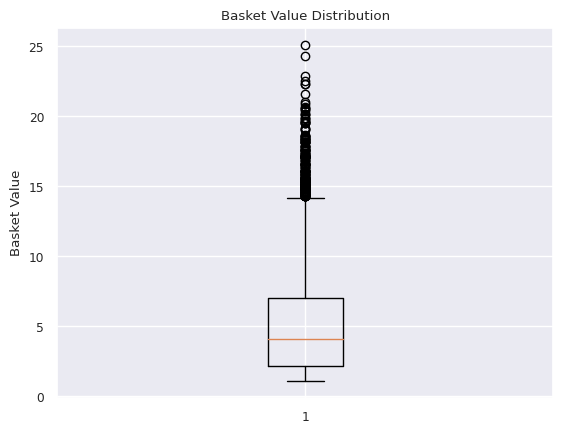

In [131]:
plt.boxplot(data['basket_value'])
plt.title('Basket Value Distribution')
plt.ylabel('Basket Value')
plt.show()

The box represents the middle 50% of the data,based on this plot, we can see that the 'basket_value' variable is positively skewed, with a long tail of high values that fall outside of the range of the rest of the data. The median value is relatively low compared to the range of values in the data, which is a common characteristic of positively skewed data.

There are several outliers (represented by the dots outside the whiskers) that fall far outside of the range of the rest of the data.


**Together, these two plots suggest that the majority of customers have relatively low basket values, but there are a few customers with very high basket values that are driving up the overall distribution.**

Now we want to study certain products in our data.So we will keep only the columns that has them.


In [132]:
# List of item names to keep
item_names = ['citrus fruit', 'tropical fruit', 'whole milk', 'other vegetables', 'rolls/buns', 'chocolate', 'bottled water', 'yogurt', 'sausage', 'root vegetables', 'pastry', 'sodα', 'cream']

# Select only the relevant columns
data_filtered = data.iloc[:, :3]  # keep the first 3 columns because we dont want to modify them(id,basket_value	recency_days)
for i in range(1, 33):  # loop over columns Item_1 to Item_32
    col_name = 'Item_' + str(i)
    if col_name in data.columns:  # check if column exists in data
        col_data = data[data[col_name].isin(item_names)][col_name]
        if not col_data.empty:  # check if column has any data
            data_filtered = pd.concat([data_filtered, col_data], axis=1)
#print
data_filtered.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_18,Item_19,Item_20,Item_21,Item_22,Item_24,Item_25,Item_26,Item_27,Item_28
0,1,1.1,2,citrus fruit,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,NaN,yogurt,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see we kept only the products that we want to study without unrelated columns (like the column Item_23 it's deleted),now we are going to form our data into binary.

In [133]:
# Select only the relevant columns and drop columns with all NaNs
binary_data = data_filtered.iloc[:, :3]  # keep the first 3 columns
for i in range(1, 33):  # loop over columns Item_1 to Item_32
    col_name = 'Item_' + str(i)
    if col_name in data_filtered.columns:  # check if column exists in data
        # encode as binary values (1 if item present, 0 if not)
        binary_data[col_name] = data_filtered[col_name].isin(item_names).astype(int)


binary_data.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_18,Item_19,Item_20,Item_21,Item_22,Item_24,Item_25,Item_26,Item_27,Item_28
0,1,1.1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3.6,31,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.2,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,6.6,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2.5,66,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we are going to visual our binary data with histogram and heatmap.

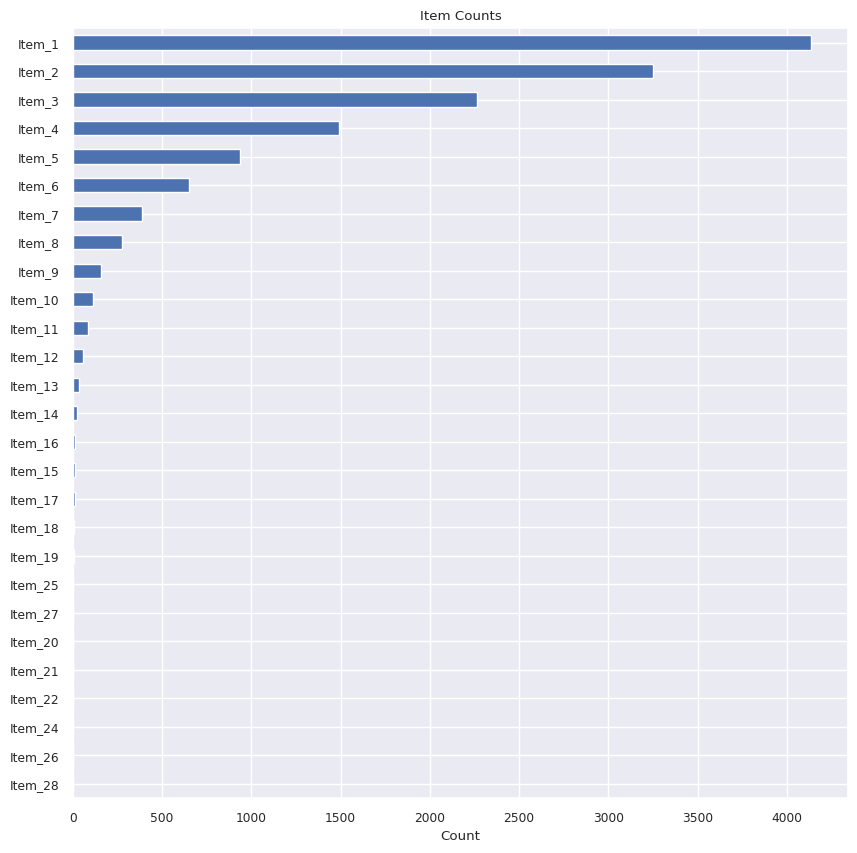

In [134]:
# Histogram

binary_data.drop(['id', 'basket_value', 'recency_days'], axis=1).sum().sort_values().plot(kind='barh', figsize=(10,10))
plt.xlabel('Count')
plt.title('Item Counts')
plt.show()

<Axes: >

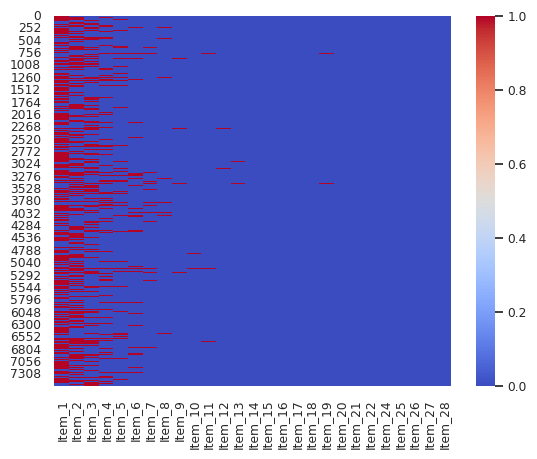

In [135]:
import seaborn as sns
# Heatmap 

# Select only the item columns
item_cols = binary_data.columns[3:]

# Create a new DataFrame with only the item columns
binary_data_items = binary_data[item_cols]

# Create a heatmap of the binary data
sns.heatmap(binary_data_items, cmap='coolwarm', cbar=True)

**The histograms showed that most customers are buying smaller portions, while a smaller number of customers are making larger purchases. The heatmap also showed that there are very few customers who buy all of the products in our dataset, while most customers only buy a small number of items.**

# **Άσκηση 2. Μάθηση κανόνων συσχέτισης με την μέθοδο Apriori**